<a href="https://colab.research.google.com/github/adcaceres69/pruebasPython/blob/main/Storytelling_ArmandoCaceres_42365_clase36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando librerías y módulos (subcarpetas) requeridos
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

## El Dataset presentado consiste en información relacionada a las liquidiaciones de un mes en particular, de empleados públicos de diferentes escalafones.

In [ ]:
# Leer el archivo Excel
df = pd.read_excel("/TODAS_LIQ_060923_v1.xlsx")

In [ ]:
# información general del set de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73546 entries, 0 to 73545
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   INSIT                   73546 non-null  object 
 1   PUESTO                  73546 non-null  int64  
 2   LEGAJO                  73546 non-null  int64  
 3   ESCALAFON               73546 non-null  object 
 4   CATEGORIA               73546 non-null  object 
 5   CLASE                   73546 non-null  int64  
 6   TOTAL_REM_HABER         73546 non-null  float64
 7   TOTAL_NOREM_HABER       73546 non-null  float64
 8   COD188_ASISTENCIA       73546 non-null  float64
 9   COD121_HORAS_EXTRAS     73546 non-null  float64
 10  COD633_PRODUCTIVIDAD    73546 non-null  float64
 11  COD602_FONAVI           73546 non-null  float64
 12  COD602_DIA_INHABIL      73546 non-null  float64
 13  COD602_TAREA_DIF        73546 non-null  float64
 14  RENTAS                  73546 non-null

In [ ]:
## agregado 250923 - puebas de exclusion de columnas
df.loc[:4 , :-1]

In [ ]:
## fin de agregado 250923

In [ ]:
# Filas y columnas del dataset
df.shape

(73546, 22)

In [ ]:
# estas son las columnas del dataset
df.columns

Index(['INSIT', 'PUESTO', 'LEGAJO', 'ESCALAFON', 'CATEGORIA', 'CLASE',
       'TOTAL_REM_HABER', 'TOTAL_NOREM_HABER', 'COD188_ASISTENCIA',
       'COD121_HORAS_EXTRAS', 'COD633_PRODUCTIVIDAD', 'COD602_FONAVI',
       'COD602_DIA_INHABIL', 'COD602_TAREA_DIF', 'RENTAS', 'GP', 'GUARDIAS',
       'CONECTIVIDAD', 'INCENTIVOS', 'GUARDIAS_ROT', 'MIN_GAR',
       'COMPLEMENTARIAS_VARIAS'],
      dtype='object')

In [ ]:
# datos de ejemplos
df.head()

,INSIT,PUESTO,LEGAJO,ESCALAFON,CATEGORIA,CLASE,TOTAL_REM_HABER,TOTAL_NOREM_HABER,COD188_ASISTENCIA,COD121_HORAS_EXTRAS,...,COD602_DIA_INHABIL,COD602_TAREA_DIF,RENTAS,GP,GUARDIAS,CONECTIVIDAD,INCENTIVOS,GUARDIAS_ROT,MIN_GAR,COMPLEMENTARIAS_VARIAS
0,Policía de la Provincia de Formosa,552754,198871,40-Oficial Ayudante(N1-40),N1,40,195366.87,164165.39,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13615.07,23556.05
1,Policía de la Provincia de Formosa,545485,197418,33-Cabo(N1-33),N1,33,169673.06,112326.95,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33142.36,3769.04
2,Policía de la Provincia de Formosa,473133,181267,33-Cabo(N1-33),N1,33,148598.25,128343.82,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49159.23,47112.82
3,Policía de la Provincia de Formosa,473234,180919,33-Cabo(N1-33),N1,33,158906.84,120509.29,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41324.70,12249.29
4,Policía de la Provincia de Formosa,507491,190837,41-Oficial Subinspector(N1-41),N1,41,224296.90,193285.21,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,9422.42


In [ ]:
df.MIN_GAR.isnull().sum()

40386

## se observa información de Instituciones y escalafones pero los datos estan ofuscados y no se presentan datos personales de los agentes

In [ ]:
#creamos una copia modificada del dataset para generar datos estadisticos
df_sinceros = df

In [ ]:
#eliminando primero los ceros
columnas_a_cambiar = ['TOTAL_REM_HABER', 'TOTAL_NOREM_HABER', 'COD188_ASISTENCIA',
       'COD121_HORAS_EXTRAS', 'COD633_PRODUCTIVIDAD', 'COD602_FONAVI',
       'COD602_DIA_INHABIL', 'COD602_TAREA_DIF', 'RENTAS', 'GP', 'GUARDIAS',
       'CONECTIVIDAD', 'INCENTIVOS', 'GUARDIAS_ROT', 'MIN_GAR',
       'COMPLEMENTARIAS_VARIAS']
for columna in columnas_a_cambiar:
  df_sinceros[columna] = df_sinceros[columna].replace(0, np.nan)

In [ ]:
df_sinceros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73546 entries, 0 to 73545
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   INSIT                   73546 non-null  object 
 1   PUESTO                  73546 non-null  int64  
 2   LEGAJO                  73546 non-null  int64  
 3   ESCALAFON               73546 non-null  object 
 4   CATEGORIA               73546 non-null  object 
 5   CLASE                   73546 non-null  int64  
 6   TOTAL_REM_HABER         67107 non-null  float64
 7   TOTAL_NOREM_HABER       36115 non-null  float64
 8   COD188_ASISTENCIA       3846 non-null   float64
 9   COD121_HORAS_EXTRAS     73 non-null     float64
 10  COD633_PRODUCTIVIDAD    169 non-null    float64
 11  COD602_FONAVI           209 non-null    float64
 12  COD602_DIA_INHABIL      166 non-null    float64
 13  COD602_TAREA_DIF        25 non-null     float64
 14  RENTAS                  397 non-null  

In [ ]:
#para evitar notaciones cientificas; formateo la salidas de los campos numericos
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
df_sinceros.describe(exclude=object)

,PUESTO,LEGAJO,CLASE,TOTAL_REM_HABER,TOTAL_NOREM_HABER,COD188_ASISTENCIA,COD121_HORAS_EXTRAS,COD633_PRODUCTIVIDAD,COD602_FONAVI,COD602_DIA_INHABIL,COD602_TAREA_DIF,RENTAS,GP,GUARDIAS,CONECTIVIDAD,INCENTIVOS,GUARDIAS_ROT,MIN_GAR,COMPLEMENTARIAS_VARIAS
count,73546.00,73546.00,73546.00,67107.00,36115.00,3846.00,73.00,169.00,209.00,166.00,25.00,397.00,509.00,5169.00,31503.00,34547.00,384.00,33160.00,3789.00
mean,481086.40,105869.15,21.44,155296.39,46972.62,166607.11,96996.95,224801.05,131031.27,27820.71,35236.62,294926.07,1172481.41,246362.26,2989.74,7300.51,59490.88,26925.94,58372.45
std,191326.39,77235.16,21.10,134056.75,60023.70,73506.79,21755.51,104704.23,51304.51,6810.37,12378.39,128814.23,294223.17,203288.10,2594.42,6708.67,37615.58,25730.70,131379.52
min,9.00,2.00,1.00,47.00,0.40,8697.00,23027.40,129354.69,47889.09,20507.30,18456.60,4292.17,235035.00,4622.40,4.75,4.15,16607.79,0.40,3.25
25%,344800.25,18148.50,4.00,43018.36,5159.65,116500.00,94413.66,139937.23,114933.81,20507.30,26762.05,273299.79,1096830.00,101472.33,950.00,2487.30,41847.82,5059.09,7538.08
50%,546477.50,115832.00,19.00,134305.46,19862.58,167200.00,108229.34,150536.23,114933.82,29735.60,30453.31,304054.22,1096830.00,185745.96,1581.75,4141.38,46427.70,16647.71,19787.21
75%,645013.75,177389.50,31.00,214199.32,72803.19,199800.00,108229.34,355549.27,114933.82,33837.00,42373.24,378466.61,1410210.00,302500.32,4750.00,12436.59,64557.14,45561.47,54651.10
max,685400.00,227361.00,99.00,1477315.97,696999.36,819400.00,112834.64,464881.58,383112.72,42039.90,59906.91,549570.33,2350350.00,952331.04,9500.00,24873.15,275257.18,151349.79,1723590.00


<Axes: >

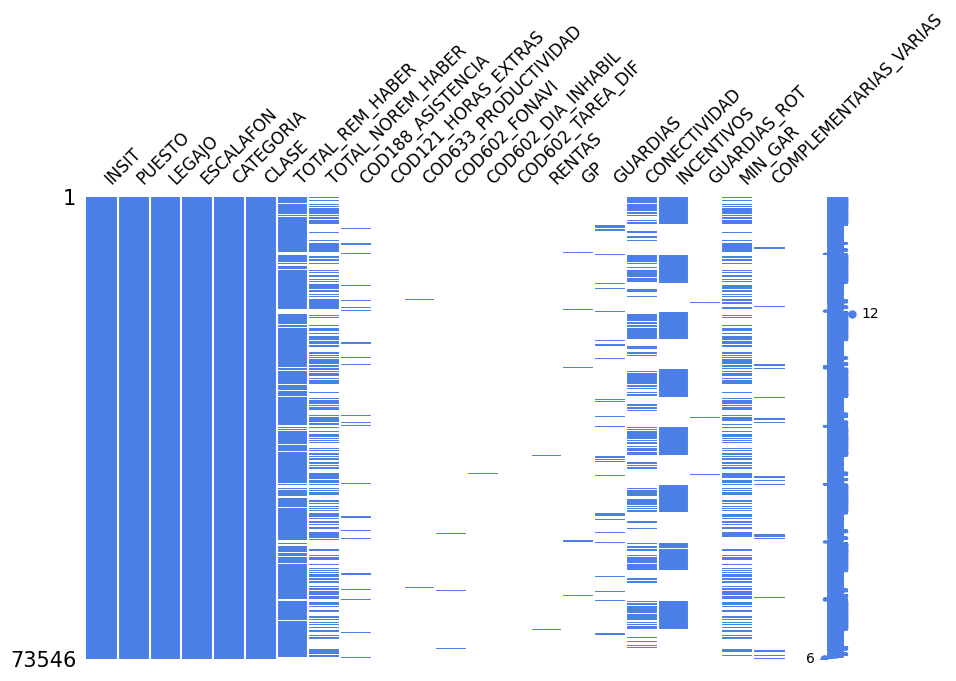

In [ ]:
msno.matrix(df_sinceros, figsize=(10, 6), fontsize=12, color=(0.3, 0.5, 0.9))

In [ ]:
df.LEGAJO.nunique()

41140

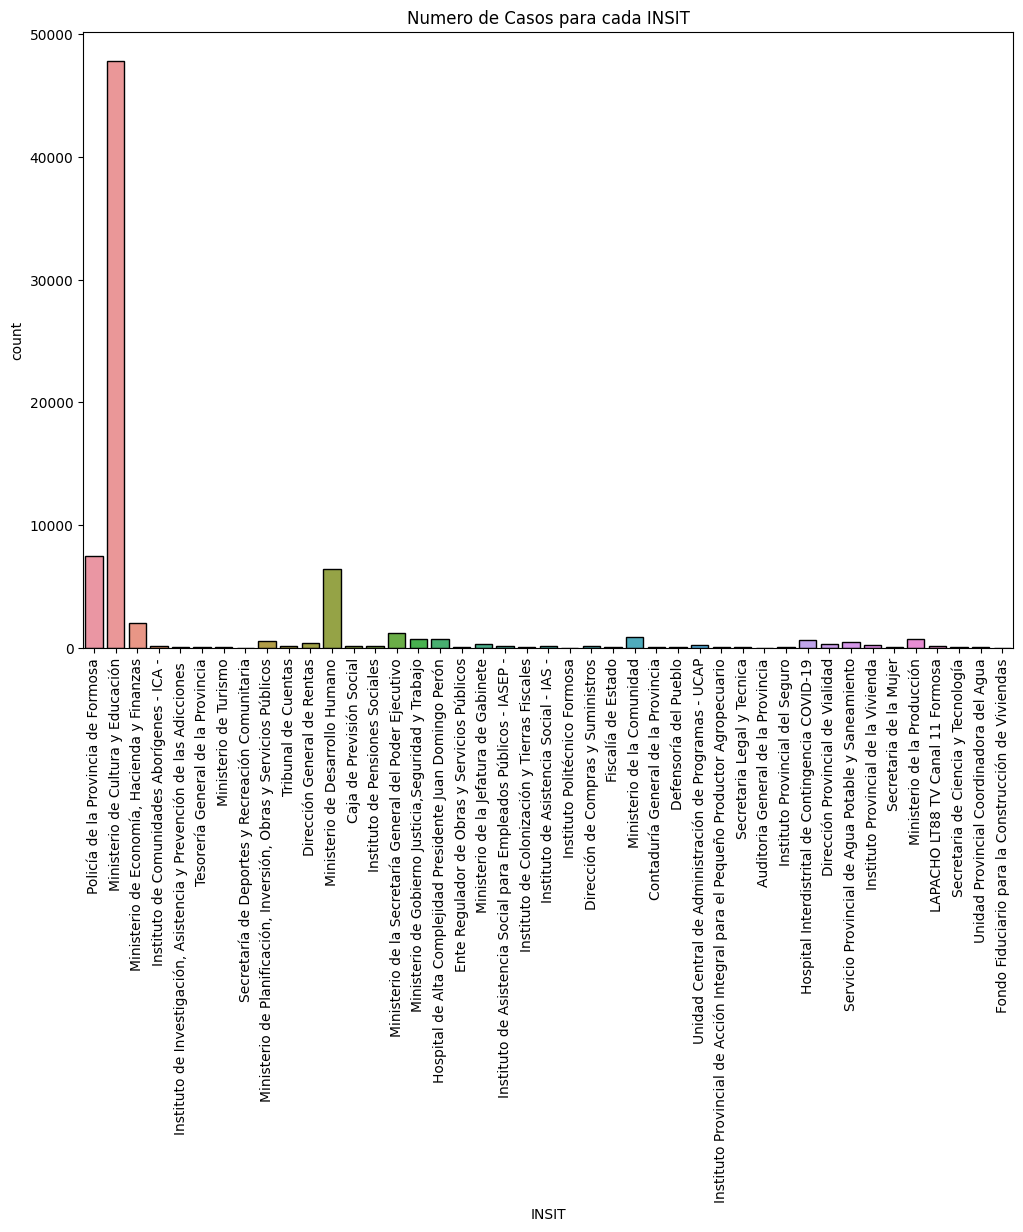

In [ ]:
# Generando bar-plot de una variable categórica
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="INSIT", data=df_sinceros, edgecolor='k')
plt.title("Numero de Casos para cada {0}".format("INSIT"))
plt.xticks(rotation=90)
plt.show()

In [ ]:
#df_barplot = df_sinceros[['INSIT','ESC,'LEGAJO]].groupby(by=['LEGAJO']).sum().reset_index()

In [ ]:
#df_countplot = df_sinceros[['ESCALAFON','LEGAJO']].groupby(by=['ESCALAFON']).count().reset_index()

In [ ]:
df_countplot

,ESCALAFON,LEGAJO
0,32-Agente(N1-32),2220
1,33-Cabo(N1-33),2038
2,34-Cabo 1ero(N1-34),698
3,35-Sargento(N1-35),660
4,36-Sargento 1ero(N1-36),186
...,...,...
813,Vicedirector Esc. N.M S/D.E.(9P-54),3
814,Vicedirector Nivel Medio(7C-12),1
815,Vicedirector S/D.E. Educ. Esp. (6-79),1
816,Vicedirector S/D.E.(6-39),5


In [ ]:
# Generando bar-plot de una variable categórica
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="ESCALAFON", data=df_sinceros, edgecolor='k')
plt.title("Numero de Casos para cada {0}".format("ESCALAFON"))
plt.xticks(rotation=90)
plt.show()

## Comenzamos preguntandonos:
  * Cuantos escalafones existen?
  * Cuantos agentes por escalafon?
  * Como sera la distribución del Total de Haberes por Legajo?
  * Como sera la distribución del Total de Haberes por Institución?

In [ ]:
#Cantidad de Legajos
df_sinceros.LEGAJO.nunique()

41140

In [ ]:
#Cantidad de Escalafones
df_sinceros.ESCALAFON.nunique()

818

## La provincia de Formosa aporta a sus empleados un minimo garantizado que figura en la columna 'MIN_GAR', ese valor se encuentra tambien subsumido en la columna 'TOTAL_NOREM_HABER'.
* por lo planteado no la incluiremos en las columnas a sumar para generar un total general por fila

## y agregaremos las siguientes preguntas:
* cuantos agentes perciben el minimo garantizado?
* que porcentaje representa en el total de los haberes de un agente?

In [ ]:
df_sinceros.columns

Index(['INSIT', 'PUESTO', 'LEGAJO', 'ESCALAFON', 'CATEGORIA', 'CLASE',
       'TOTAL_REM_HABER', 'TOTAL_NOREM_HABER', 'COD188_ASISTENCIA',
       'COD121_HORAS_EXTRAS', 'COD633_PRODUCTIVIDAD', 'COD602_FONAVI',
       'COD602_DIA_INHABIL', 'COD602_TAREA_DIF', 'RENTAS', 'GP', 'GUARDIAS',
       'CONECTIVIDAD', 'INCENTIVOS', 'GUARDIAS_ROT', 'MIN_GAR',
       'COMPLEMENTARIAS_VARIAS'],
      dtype='object')

In [ ]:
df_sinceros.corr()

<ipython-input-15-463adc41e9bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sinceros.corr()


,PUESTO,LEGAJO,CLASE,TOTAL_REM_HABER,TOTAL_NOREM_HABER,COD188_ASISTENCIA,COD121_HORAS_EXTRAS,COD633_PRODUCTIVIDAD,COD602_FONAVI,COD602_DIA_INHABIL,COD602_TAREA_DIF,RENTAS,GP,GUARDIAS,CONECTIVIDAD,INCENTIVOS,GUARDIAS_ROT,MIN_GAR,COMPLEMENTARIAS_VARIAS
PUESTO,1.00,0.52,-0.13,-0.26,-0.23,0.20,-0.41,0.39,0.02,-0.00,0.64,-0.28,-0.12,0.03,-0.13,-0.23,-0.18,-0.02,-0.23
LEGAJO,0.52,1.00,0.00,-0.16,0.04,0.14,-0.40,0.19,-0.02,-0.35,0.20,-0.26,-0.07,-0.08,-0.15,-0.20,-0.21,0.29,-0.25
CLASE,-0.13,0.00,1.00,0.45,0.38,0.49,NaN,0.52,0.16,0.97,0.79,0.77,0.87,-0.54,0.68,0.59,0.50,0.34,-0.16
TOTAL_REM_HABER,-0.26,-0.16,0.45,1.00,0.55,0.46,0.46,0.71,0.20,0.92,NaN,-0.06,0.68,0.62,0.89,0.87,0.68,0.30,0.51
TOTAL_NOREM_HABER,-0.23,0.04,0.38,0.55,1.00,-0.25,-0.46,-0.35,-0.21,-0.88,NaN,0.37,-0.03,-0.25,0.62,0.49,-0.24,0.68,-0.15
COD188_ASISTENCIA,0.20,0.14,0.49,0.46,-0.25,1.00,NaN,NaN,NaN,0.80,NaN,1.00,-0.30,-1.00,NaN,NaN,NaN,-0.26,0.22
COD121_HORAS_EXTRAS,-0.41,-0.40,NaN,0.46,-0.46,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.46,NaN
COD633_PRODUCTIVIDAD,0.39,0.19,0.52,0.71,-0.35,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.35,NaN
COD602_FONAVI,0.02,-0.02,0.16,0.20,-0.21,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.21,NaN
COD602_DIA_INHABIL,-0.00,-0.35,0.97,0.92,-0.88,0.80,NaN,NaN,NaN,1.00,0.76,NaN,NaN,NaN,NaN,NaN,NaN,-0.88,NaN


<ipython-input-20-5c5c53f1d5c1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sinceros.corr(), annot=True, cmap = "viridis") \


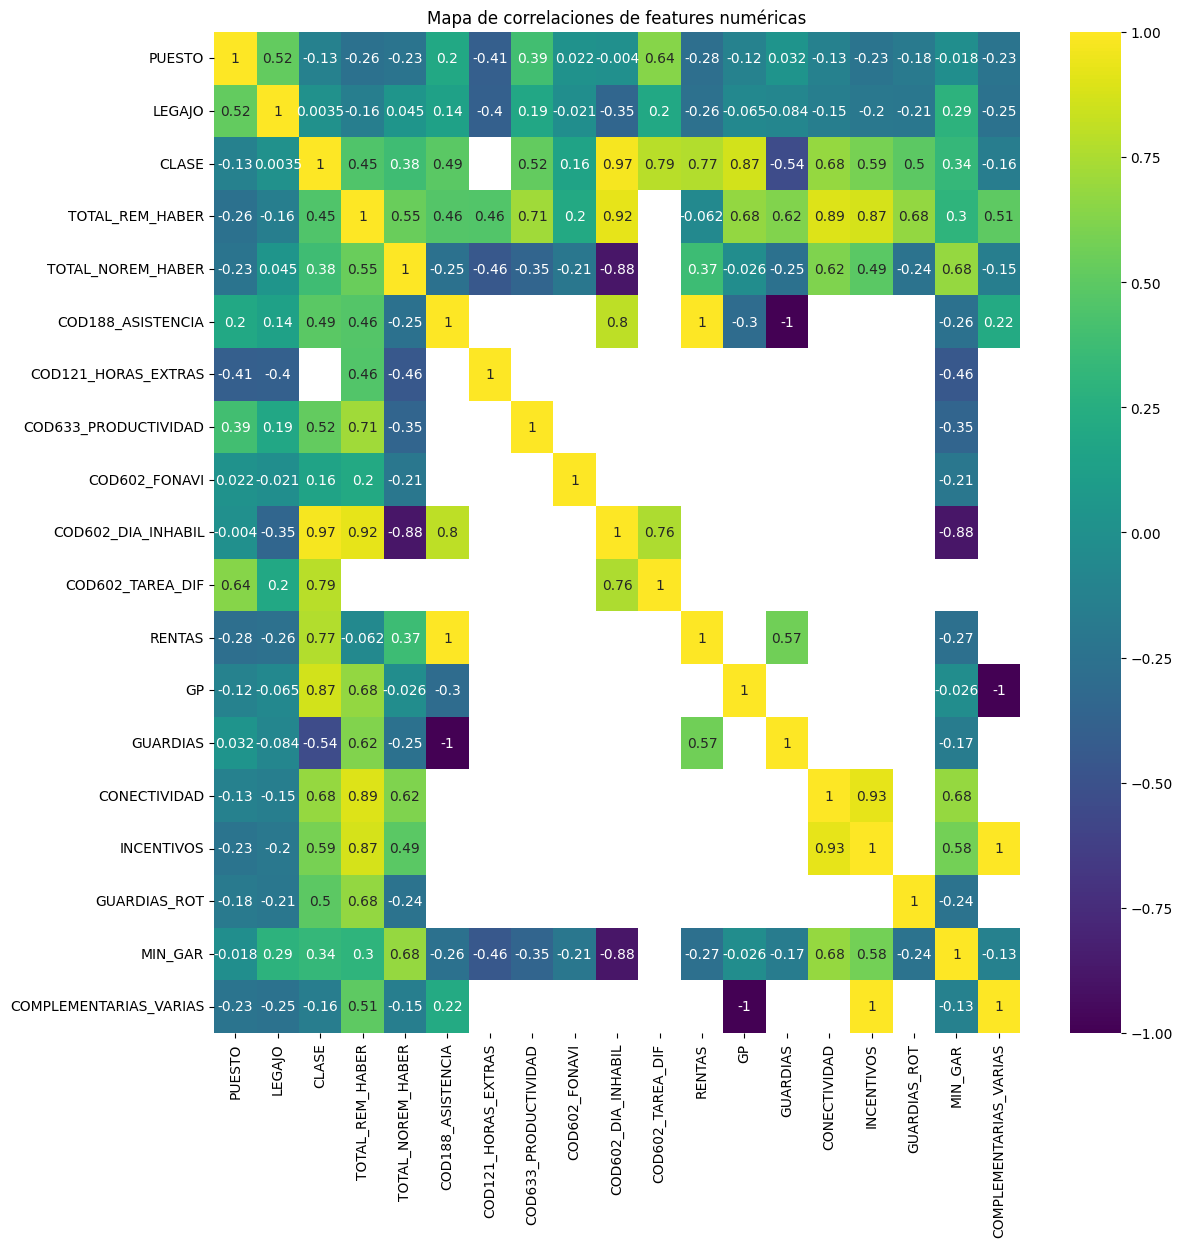

In [ ]:
# Generating heat-map with the correlation analysis
plt.figure(figsize=(13,13))
sns.heatmap(df_sinceros.corr(), annot=True, cmap = "viridis") \
    .set_title('Mapa de correlaciones de features numéricas')
plt.show()

In [ ]:
sns.pairplot(data=df_sinceros)

In [ ]:
df_barplot = df_sinceros[['INSIT','ESCALAFON','LEGAJO','MIN_GAR']].groupby(by=['LEGAJO']).count().reset_index()

In [ ]:
df_barplot

,LEGAJO,INSIT,ESCALAFON,MIN_GAR
0,2,1,1,0
1,3,1,1,1
2,4,2,2,0
3,6,1,1,1
4,7,2,2,0
...,...,...,...,...
41135,227351,1,1,0
41136,227352,1,1,0
41137,227353,1,1,0
41138,227354,1,1,0


## Cantiad de Agentes sin Minimo Garantizado

In [ ]:
##Cantidad de Agentes sin Minimo Garantizado
np.count_nonzero(df_barplot.MIN_GAR)

22196

## Por diferencia podemos decir que existen 18944 agentes que si cobran dicho concepto eso representa un 46.05% de los agentes

In [ ]:
# Creo una tb de las columnas que me interesaría sumar
columnas_a_sumar = ['TOTAL_REM_HABER', 'TOTAL_NOREM_HABER', 'COD188_ASISTENCIA',
       'COD121_HORAS_EXTRAS', 'COD633_PRODUCTIVIDAD', 'COD602_FONAVI',
       'COD602_DIA_INHABIL', 'COD602_TAREA_DIF', 'RENTAS', 'GP', 'GUARDIAS',
       'CONECTIVIDAD', 'INCENTIVOS', 'GUARDIAS_ROT',
       'COMPLEMENTARIAS_VARIAS']

df_sinceros['sueldo_bruto'] = df_sinceros[columnas_a_sumar].sum(axis=1)

In [ ]:
df_sinceros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73546 entries, 0 to 73545
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   INSIT                   73546 non-null  object 
 1   PUESTO                  73546 non-null  int64  
 2   LEGAJO                  73546 non-null  int64  
 3   ESCALAFON               73546 non-null  object 
 4   CATEGORIA               73546 non-null  object 
 5   CLASE                   73546 non-null  int64  
 6   TOTAL_REM_HABER         67107 non-null  float64
 7   TOTAL_NOREM_HABER       36115 non-null  float64
 8   COD188_ASISTENCIA       3846 non-null   float64
 9   COD121_HORAS_EXTRAS     73 non-null     float64
 10  COD633_PRODUCTIVIDAD    169 non-null    float64
 11  COD602_FONAVI           209 non-null    float64
 12  COD602_DIA_INHABIL      166 non-null    float64
 13  COD602_TAREA_DIF        25 non-null     float64
 14  RENTAS                  397 non-null  

## Aqui creo un nuevo dataframe para generar totales por Legajo

In [ ]:
df_tot_1 = df_sinceros.groupby('LEGAJO')[["TOTAL_REM_HABER", "TOTAL_NOREM_HABER", "COD188_ASISTENCIA", "COD121_HORAS_EXTRAS",
                    "COD633_PRODUCTIVIDAD", "COD602_FONAVI", "COD602_DIA_INHABIL", "COD602_TAREA_DIF",
                    "RENTAS", "GP", "GUARDIAS", "CONECTIVIDAD", "INCENTIVOS", "GUARDIAS_ROT",
                    "COMPLEMENTARIAS_VARIAS", 'sueldo_bruto']].sum()

In [ ]:
df_tot_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41140 entries, 2 to 227361
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TOTAL_REM_HABER         41140 non-null  float64
 1   TOTAL_NOREM_HABER       41140 non-null  float64
 2   COD188_ASISTENCIA       41140 non-null  float64
 3   COD121_HORAS_EXTRAS     41140 non-null  float64
 4   COD633_PRODUCTIVIDAD    41140 non-null  float64
 5   COD602_FONAVI           41140 non-null  float64
 6   COD602_DIA_INHABIL      41140 non-null  float64
 7   COD602_TAREA_DIF        41140 non-null  float64
 8   RENTAS                  41140 non-null  float64
 9   GP                      41140 non-null  float64
 10  GUARDIAS                41140 non-null  float64
 11  CONECTIVIDAD            41140 non-null  float64
 12  INCENTIVOS              41140 non-null  float64
 13  GUARDIAS_ROT            41140 non-null  float64
 14  COMPLEMENTARIAS_VARIAS  41140 non-nul

In [ ]:
df_tot_1.shape

(41140, 16)

In [ ]:
#reseteo el indice para que legajo sea una columna
df_tot_1 = df_tot_1.reset_index()

([], [])

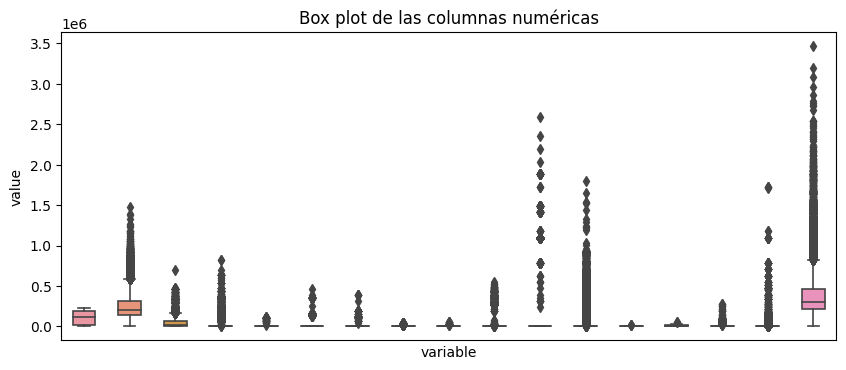

In [ ]:
# Seleccionando columnas numéricas y eliminando las que no son útiles
#new_df = df_data.select_dtypes(include="number")
#new_df.drop(columns="ID", inplace=True)

# Generando box-plot de variables numéricas
plt.figure(figsize=(10, 4))
sns.boxplot(x="variable", y="value", data=pd.melt(df_tot_1[df_tot_1.columns]), orient = 'v', width = 0.5, linewidth = 1.2)
plt.title("Box plot de las columnas numéricas")
plt.xticks([])

#pd.melt(df_tot_1[df_tot_1.columns])

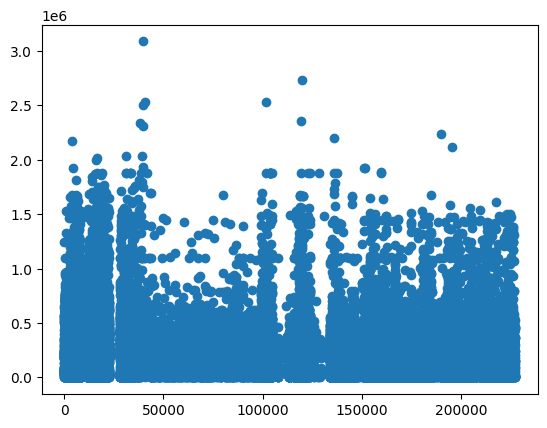

<Figure size 2800x2400 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
fig = plt.figure(figsize=(28,24))
#ax = fig.add_subplot(projection="3d")
ax.scatter(df.LEGAJO, df.sueldo_bruto)

## necesite hacer unas transformaciones - este trabajo es real y para mi trabajo

In [ ]:
# ya tiengo df_sinceros definido

# Definir una función de agregación personalizada para 'INSIT' y 'ESCALAFON' que tome el primer valor
def primer_valor(series):
    return series.iloc[0]

# Lista de columnas a incluir en el resultado
columnas_incluidas = df_sinceros.columns.tolist()

# Remover 'LEGAJO', 'INSIT' y 'ESCALAFON' de las columnas incluidas
columnas_incluidas.remove('LEGAJO')
columnas_incluidas.remove('INSIT')
columnas_incluidas.remove('ESCALAFON')

# Agrupar por 'LEGAJO' y aplicar la función de agregación personalizada para 'INSIT' y 'ESCALAFON',
# y usar 'first' para el resto de las columnas
df_tot_1 = df_sinceros.groupby('LEGAJO', as_index=False).agg({'INSIT': primer_valor, 'ESCALAFON': primer_valor, **{col: 'first' for col in columnas_incluidas}})

# Esto dará como resultado un DataFrame df_tot_1 con 'LEGAJO' único, el primer valor de 'INSIT' y 'ESCALAFON',
# y todas las demás columnas intactas.




In [ ]:
df_tot_1.head()

In [ ]:
df_tot_1.info()

In [ ]:
df_nuevo = df_tot_1[['LEGAJO', 'sueldo_bruto', 'MIN_GAR']]

In [ ]:
df_nuevo['MIN_GAR'] = df_nuevo['MIN_GAR'].fillna(0)

<ipython-input-90-5938e6fa5db4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['MIN_GAR'] = df_nuevo['MIN_GAR'].fillna(0)


In [ ]:
df_nuevo

,LEGAJO,sueldo_bruto,MIN_GAR
0,2,571654.31,0.00
1,3,197792.16,16647.71
2,4,1658.21,0.00
3,6,198548.83,13621.05
4,7,546993.98,0.00
...,...,...,...
41135,227351,464536.07,0.00
41136,227352,362448.85,0.00
41137,227353,375496.07,0.00
41138,227354,447385.61,0.00


### Pedro; posta que siento que cada que vez que debo arrancar con una tarea es como empezar de nuevo. No obstante es notable darme cuenta que lo mas importante es conocer los datos y saber que estoy buscando de esos datos.
### Ruben dice que somos expertos a esta altura debemos saber mucho de visualizaciones pero... si no estas con eso todo el tiempo es muy dificil. Gracias como siempre, por el aguante. Saludos.

In [ ]:
##df_sinceros

In [ ]:
##name_arch = 'df_sinceros.xlsx'

In [ ]:
##ruta_arch = '/' + name_arch

In [ ]:
##df_sinceros.to_excel(ruta_arch, index=False)

In [ ]:
##from google.colab import files
##files.download(ruta_arch)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>